# Multiple linear regression

Unlike the simple linear regression model, the multiple linear regression model is defined as any linear regression model with at least two explanatory variables. But what do we do when we have several variables? This is what we will see in this chapter. And you will finally be able to measure all the power of linear regression despite its simplicity!

## Data

First of all, we will load our dataset. This is a fake dataset for the example. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("./data/data_multi.csv")

In [3]:
df.head(5)

,x_1,x_2,y
0,1.054452,-1.070753,-81.464433
1,-0.362741,-0.634322,-78.752795
2,-0.854096,0.313068,2.218414
3,1.326386,0.298238,52.234160
4,-0.461585,-1.315907,-159.639258


In [4]:
df.shape

(100, 3)

As you can see we now have 100 rows, 2 features and 1 target.

**Exercise:** Create the `X` and `y` variables and define which column will be the target and which column will be the feature. 
They must be of type `numpy.ndarray`. Our variable `X` has two dimensions this time.

In [5]:
X = np.array(df[['x_1', 'x_2']]).reshape(-1, 1)  
y = np.array(df['y']).reshape(-1, 1)  

### Relationship between variables

To represent a dataset that has two features, we can use 3D visualization.

**Exercise:** Use a 3D matplotlib (or other) graph to view the dataset. 

C:\Users\pieta\AppData\Local\Temp\ipykernel_21148\2342522271.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(df['x_1'], df['x_2'], df['y'], cmap='Greens')


Text(0.5, 0.92, '3D scatter plot')

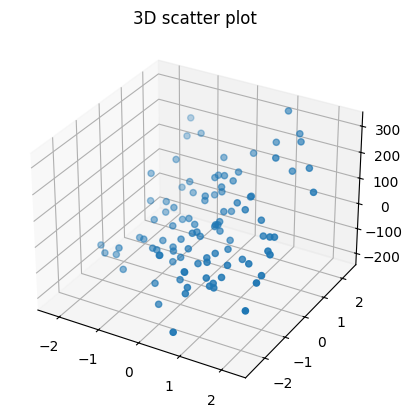

In [6]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df['x_1'], df['x_2'], df['y'], cmap='Greens')
ax.set_title('3D scatter plot')


If you change the camera angle, you should come across something that looks like this: 

<img src="./assets/3dplot.png" />

This appears to be a positive linear correlation. What do you say?  


If our dataset has more than two dimensions, then we won't be able to display it in 3D. Unfortunately for us, the human being can only perceive 3 dimensions. In this case, we will have no other choice than to display one scatter plot per variable.

And it is there that we realize that the linear regression may be very simple, as soon as we go beyond 3 dimensions, the human being will hardly be able to visualize all the data while the machines are doing very well.

**Exercise:** Create a scatter plot for each variable with respect to the target. You may use  `plt.tight_layout()` after plotting if the graph is too cramped.

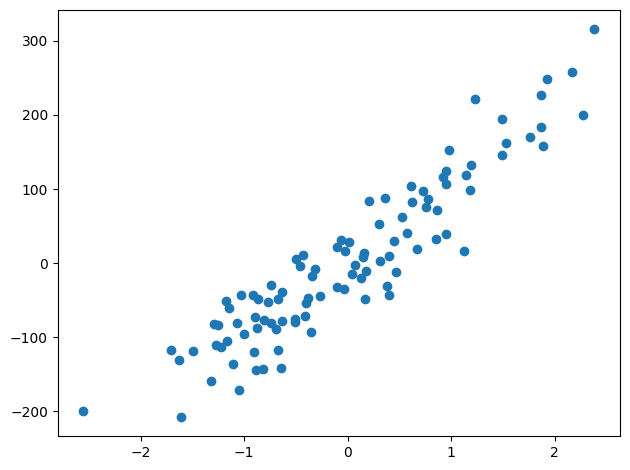

0.9302992377775383


In [7]:
plt.scatter(df['x_2'], df['y'])
plt.tight_layout()
plt.show()


coeff = df['x_2'].corr(df['y'])
print(coeff)


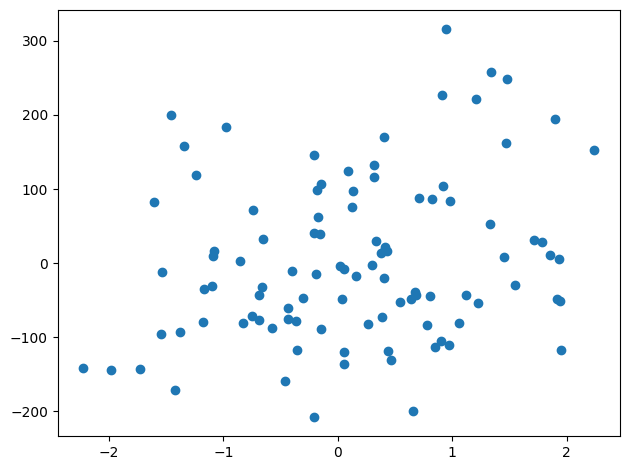

0.23565036822170068


In [8]:
import matplotlib.pyplot as plt

plt.scatter(df['x_1'], df['y'])
plt.tight_layout()
plt.show()


coeff = df['x_1'].corr(df['y'])
print(coeff)

**Exercise:** Show correlation coefficients. 

In [9]:
coeffx_2 = df['x_2'].corr(df['y'])
print(coeffx_2)

coeffx_1 = df['x_1'].corr(df['y'])
print(coeffx_1)

0.9302992377775383
0.23565036822170068


### Split the dataset

You now know the process!

**Exercise:** Import `train_test_split` from `sklearn` and split the dataset and create the variables `X_train`, `X_test`, `y_train`, `y_test`.

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.array(df[['x_1', 'x_2']]) #already in 2D  
y = np.array(df['y']).reshape(-1, 1)  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (80, 2)
X_test shape: (20, 2)
y_train shape: (80, 1)
y_test shape: (20, 1)


##  Load and fit the model (with scikit-learn)

How to use `sklearn` now with multiple features? Well, it's simple, you don't need to change anything as `sklearn` takes care of everything for you.

1. Import `LinearRegression` from `sklearn`
2. Create a `regressor` variable and instantiate your `LinearRegression` class.
3. Train your model with `X_train` and `y_train`.
4. Display the score of your model with `X_train` and `y_train`.
5. Use the predict method of your model on your test dataset (`X_test`).
6. Display the score of your model with `X_test` and `y_test`.

In [11]:
from sklearn.linear_model import LinearRegression


In [12]:
model = LinearRegression()


In [13]:
model.fit(X_train,y_train)

LinearRegression()

In [14]:
model.score(X_train,y_train)

0.9255819294651559

In [15]:
y_pred = model.predict(X_test)

In [16]:
model.score(X_test,y_test)

0.9418412685059917

And voilà!